In [1]:
#Salary_Data_Scientist Predection

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline

In [3]:
df_Train =pd.read_csv('/content/Final_Train_Dataset.csv')
df_Test =pd.read_csv('/content/Final_Test_Dataset.csv')

In [6]:
df_Train.head()

,Unnamed: 0,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
0,0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687
1,1,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,NaN,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458
2,2,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,4195
3,3,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,313
4,4,1-3 yrs,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial plan...",Gurgaon,3to6,1305


In [7]:
df_Train.shape

(19802, 9)

In [8]:
print('Columns_Training_Set:',df_Train.columns)
print('Columns_Testing_Set:',df_Test.columns)

Columns_Training_Set: Index(['Unnamed: 0', 'experience', 'job_description', 'job_desig', 'job_type',
       'key_skills', 'location', 'salary', 'company_name_encoded'],
      dtype='object')
Columns_Testing_Set: Index(['experience', 'job_description', 'job_desig', 'job_type', 'key_skills',
       'location', 'company_name_encoded'],
      dtype='object')


In [56]:
df_Train.isnull().count()

Unnamed: 0              19801
experience              19801
job_description         19801
job_desig               19801
job_type                19801
key_skills              19801
location                19801
salary                  19801
company_name_encoded    19801
min_exp                 19801
max_exp                 19801
skills_cleaned          19801
desig_cleaned           19801
clean_descp             19801
clean_loc               19801
dtype: int64

In [57]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19801 entries, 0 to 19801
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            19801 non-null  int64 
 1   experience            19801 non-null  object
 2   job_description       19801 non-null  object
 3   job_desig             19801 non-null  object
 4   job_type              19801 non-null  object
 5   key_skills            19801 non-null  object
 6   location              19801 non-null  object
 7   salary                19801 non-null  object
 8   company_name_encoded  19801 non-null  int64 
 9   min_exp               19801 non-null  int64 
 10  max_exp               19801 non-null  int64 
 11  skills_cleaned        19801 non-null  object
 12  desig_cleaned         19801 non-null  object
 13  clean_descp           19801 non-null  object
 14  clean_loc             19801 non-null  object
dtypes: int64(4), object(11)
memory usage

In [58]:
df_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601 entries, 0 to 6600
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   experience            6601 non-null   object
 1   job_description       6601 non-null   object
 2   job_desig             6601 non-null   object
 3   job_type              6601 non-null   object
 4   key_skills            6601 non-null   object
 5   location              6601 non-null   object
 6   company_name_encoded  6601 non-null   int64 
 7   min_exp               6601 non-null   int64 
 8   max_exp               6601 non-null   int64 
 9   skills_cleaned        6601 non-null   object
 10  desig_cleaned         6601 non-null   object
 11  clean_descp           6600 non-null   object
 12  clean_loc             6601 non-null   object
dtypes: int64(3), object(10)
memory usage: 670.5+ KB


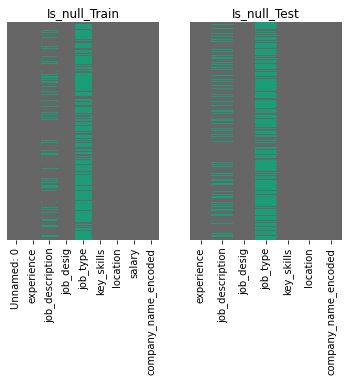

In [10]:
plt.subplot(1,2,1)
plt.title('Is_null_Train')
sns.heatmap(df_Train.isnull(),cbar=False,yticklabels=False,annot=False,cmap='Dark2_r')
plt.subplot(1,2,2)
plt.title('Is_null_Test')
sns.heatmap(df_Test.isnull(),cbar=False,yticklabels=False,annot=False,cmap='Dark2_r')

In [11]:
df_Train['job_type'].unique()

array([nan, 'Analytics', 'analytics', 'Analytic', 'ANALYTICS', 'analytic'],
      dtype=object)

In [12]:
df_Train['job_description'].nunique()

9059

In [13]:
df_Train['location'].unique()

array(['Delhi NCR(Vikas Puri)', 'Sonepat', 'Delhi NCR', ...,
       'Bengaluru, Mumbai, Gurgaon, Gurugram', 'Amravati',
       'Mumbai, Bengaluru, Chennai, Hyderabad, Dehradun, Gurgaon'],
      dtype=object)

In [14]:
df_Train.nunique()

Unnamed: 0              19802
experience                129
job_description          9059
job_desig               11708
job_type                    5
key_skills              12951
location                 1504
salary                      6
company_name_encoded     5035
dtype: int64

In [15]:
df_Train.shape

(19802, 9)

In [16]:
df_Train['salary'].describe()

count      19802
unique         6
top       10to15
freq        4500
Name: salary, dtype: object

In [26]:
df_Train['salary'].unique()

array(['6to10', '10to15', '15to25', '3to6', '25to50', '0to3'],
      dtype=object)

In [88]:
df_Train['salary']

0         6to10
1        10to15
2        15to25
3        10to15
4          3to6
          ...  
19797    15to25
19798      0to3
19799    15to25
19800    10to15
19801    10to15
Name: salary, Length: 19801, dtype: object

In [91]:
df_Train.drop(['Unnamed: 0'],axis=1,inplace =True)

In [19]:
df_Train['experience'].unique()

array(['5-7 yrs', '10-17 yrs', '5-9 yrs', '7-10 yrs', '1-3 yrs',
       '5-10 yrs', '13-15 yrs', '6-10 yrs', '2-6 yrs', '3-7 yrs',
       '10-12 yrs', '2-4 yrs', '1-6 yrs', '3-6 yrs', '5-8 yrs', '4-9 yrs',
       '3-5 yrs', '1-5 yrs', '8-12 yrs', '1-4 yrs', '10-20 yrs',
       '2-5 yrs', '6-11 yrs', '4-8 yrs', '3-4 yrs', '2-7 yrs', '7-12 yrs',
       '7-8 yrs', '14-16 yrs', '8-10 yrs', '0-5 yrs', '10-14 yrs',
       '8-11 yrs', '12-20 yrs', '3-8 yrs', '1-2 yrs', '8-13 yrs',
       '9-12 yrs', '10-15 yrs', '0-2 yrs', '11-15 yrs', '15-25 yrs',
       '6-9 yrs', '12-15 yrs', '0-3 yrs', '4-7 yrs', '4-6 yrs',
       '14-20 yrs', '2-3 yrs', '9-14 yrs', '12-17 yrs', '15-20 yrs',
       '0-1 yrs', '0-0 yrs', '12-16 yrs', '6-8 yrs', '0-4 yrs',
       '20-30 yrs', '7-9 yrs', '17-23 yrs', '4-5 yrs', '12-18 yrs',
       '10-16 yrs', '6-7 yrs', '10-18 yrs', '12-22 yrs', '15-24 yrs',
       '2-2 yrs', '8-9 yrs', '14-24 yrs', '13-23 yrs', '10-13 yrs',
       '1-1 yrs', '9-13 yrs', '15-18 yrs', '11-18

In [15]:
import re
def min_exp(exp):
    val = re.sub(r'\-',' ', exp)
    val = val.split(' ')
    val = int(val[0])
    return val

def max_exp(exp):
    val = re.sub(r'\-',' ', exp)
    val = val.split(' ')
    val = int(val[1])
    return val

df_Train['min_exp'] = df_Train['experience'].apply(min_exp)
df_Train['max_exp'] = df_Train['experience'].apply(max_exp)

df_Test['min_exp'] = df_Test['experience'].apply(min_exp)
df_Test['max_exp'] = df_Test['experience'].apply(max_exp)

In [18]:
df_Test['job_type'].unique()

array([nan, 'Analytics', 'analytics', 'ANALYTICS', 'Analytic', 'analytic'],
      dtype=object)

In [21]:
#making common_job_type
df_Train['job_type'].fillna('No_job_type',inplace=True)
df_Train['job_type'].replace('analytics','Analytics',inplace=True)
df_Train['job_type'].replace('ANALYTICS','Analytics',inplace=True)
df_Train['job_type'].replace('Analytic','Analytics',inplace=True)
df_Train['job_type'].replace('analytic','Analytics',inplace=True)

df_Test['job_type'].fillna('No_job_type',inplace=True)
df_Test['job_type'].replace('analytics','Analytics',inplace=True)
df_Test['job_type'].replace('ANALYTICS','Analytics',inplace=True)
df_Test['job_type'].replace('Analytic','Analytics',inplace=True)
df_Test['job_type'].replace('analytic','Analytics',inplace=True)

In [23]:
df_Train['job_type'].unique()

array(['No_job_type', 'Analytics'], dtype=object)

In [25]:
df_Train['key_skills'].value_counts()

part time, freelancing, data entry, present job, work from home...             84
SAS, Sdtm, Adam, Statistical Programming, Statistics, Life Sciences...         21
Fraud Analytics, People Management Skills, Team Leading, Problem Solving...    18
business analysis, System Analyst, Business Analyst...                         17
Communication Skills, Analytical, Problem Solving, itil solving...             16
                                                                               ..
sas sql, data analysis, excel, predictive modeling, data extraction...          1
data governance, data analysis, data analytics, market data...                  1
auditing, client servicing, data analytics, internal audit...                   1
User Research, Visual Design, UX, Prototyping, Usability Testing...             1
Training, Legal Issues                                                          1
Name: key_skills, Length: 12951, dtype: int64

In [26]:
df_Train = df_Train.dropna(subset=['key_skills'])

In [28]:
def clean_skills(skl):
    skills = str(skl).lower()
    skills = re.sub(r'\...','', skills)
    skills = re.sub(r',','', skills)
    skills = re.sub(r'\s+', ' ', skills)
    return skills

df_Train['skills_cleaned'] = df_Train['key_skills'].apply(clean_skills)
df_Test['skills_cleaned'] = df_Test['key_skills'].apply(clean_skills)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
df_Train['job_desig'].unique()

array(['Senior Exploit and Vulnerability Researcher', 'Head SCM',
       'Deputy Manager - Talent Management & Leadership Development - Auto',
       ..., 'Principal Software Engineer - IT',
       'Opening for CA Fresher | Amravati',
       'Unity 3D Developer - Mobile Games Development'], dtype=object)

In [39]:
#cleaning dataset function
def clean_job(desig):
    job_desig = desig.lower()
    job_desig = re.sub(r'[^a-z]', ' ', job_desig)
    job_desig = re.sub(r'\s+', ' ', job_desig)
    return job_desig

In [43]:
#job_desig cleaning
df_Train['desig_cleaned'] = df_Train['job_desig'].apply(clean_job)
df_Test['desig_cleaned'] = df_Test['job_desig'].apply(clean_job)

#handle missing
df_Train['job_description'].fillna('missing', inplace=True)
df_Test['job_description'].fillna('missing', inplace=True)
#job_description cleaning
df_Train['clean_descp'] =df_Train['job_description'].apply(clean_job)
df_Test['clean_descp'] =df_Train['job_description'].apply(clean_job)

#location cleaning
df_Train['clean_loc'] =df_Train['location'].apply(clean_job)
df_Test['clean_loc'] =df_Test['location'].apply(clean_job)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [37]:
df_Train['job_desig'].value_counts()

Business Analyst                                                        148
Data Scientist                                                           84
Data Analyst                                                             67
Product Manager                                                          60
Home Base Job/ Data Entry/online Work/part Time Work/freelancer work     58
                                                                       ... 
Walk in for Research Analyst @ Ryan India Tax Services Pvt. Ltd.walk      1
Quality Analyst - Call Centre/bpo - Telugu / Tamil - Bangalore            1
Walk In - Associate Operations (voice Process- English) Day Shift         1
Vestas - Hiring for Lead Data Scientist                                   1
SMO Expert                                                                1
Name: job_desig, Length: 11707, dtype: int64

In [44]:
df_Train.head()

,Unnamed: 0,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded,min_exp,max_exp,skills_cleaned,desig_cleaned,clean_descp,clean_loc
0,0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,No_job_type,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687,5,7,team skills communication skills analytical sk...,senior exploit and vulnerability researcher,exp minimum years good understanding of ioc ru...,delhi ncr vikas puri
1,1,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,No_job_type,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458,10,17,ppc logistics inventory management supply chai...,head scm,he should have handled a team of atleast direc...,sonepat
2,2,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,4195,5,9,hr analytics employee engagement training succ...,deputy manager talent management leadership de...,must be an effective communicator written spok...,delhi ncr
3,3,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,313,7,10,sql javascript automation python ruby analytic...,associate manager data engineering,years of overall experience in data engineeri...,bengaluru
4,4,1-3 yrs,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,No_job_type,"accounting, finance, cash flow, financial plan...",Gurgaon,3to6,1305,1,3,accounting finance cash flow financial plannin...,ts gsa senior analyst,chartered accountancy degree or mba in finance...,gurgaon


In [45]:
df_Train.columns

Index(['Unnamed: 0', 'experience', 'job_description', 'job_desig', 'job_type',
       'key_skills', 'location', 'salary', 'company_name_encoded', 'min_exp',
       'max_exp', 'skills_cleaned', 'desig_cleaned', 'clean_descp',
       'clean_loc'],
      dtype='object')

In [47]:
df_Test.columns

Index(['experience', 'job_description', 'job_desig', 'job_type', 'key_skills',
       'location', 'company_name_encoded', 'min_exp', 'max_exp',
       'skills_cleaned', 'desig_cleaned', 'clean_descp', 'clean_loc'],
      dtype='object')

In [65]:
train =df_Train.iloc[:,7:]
test =df_Test.iloc[:,6:]

In [66]:
train.head()

,salary,company_name_encoded,min_exp,max_exp,skills_cleaned,desig_cleaned,clean_descp,clean_loc
0,6to10,3687,5,7,team skills communication skills analytical sk...,senior exploit and vulnerability researcher,exp minimum years good understanding of ioc ru...,delhi ncr vikas puri
1,10to15,458,10,17,ppc logistics inventory management supply chai...,head scm,he should have handled a team of atleast direc...,sonepat
2,15to25,4195,5,9,hr analytics employee engagement training succ...,deputy manager talent management leadership de...,must be an effective communicator written spok...,delhi ncr
3,10to15,313,7,10,sql javascript automation python ruby analytic...,associate manager data engineering,years of overall experience in data engineeri...,bengaluru
4,3to6,1305,1,3,accounting finance cash flow financial plannin...,ts gsa senior analyst,chartered accountancy degree or mba in finance...,gurgaon


In [67]:
test.head()

,company_name_encoded,min_exp,max_exp,skills_cleaned,desig_cleaned,clean_descp,clean_loc
0,2066,7,12,java j2ee tomcat jboss weblogic oracle elastic...,it technology senior consultant java j ee seve...,exp minimum years good understanding of ioc ru...,bengaluru
1,2629,0,5,medical billing insurance processing,medical billing process international kpo insu...,he should have handled a team of atleast direc...,ahmedabad sola
2,2448,3,6,oracle sales functional consultancy troublesho...,oracle sales cloud functional consultant,must be an effective communicator written spok...,bengaluru
3,2711,0,3,offline online internet part time home base wo...,looking for freshers who want to work with us,years of overall experience in data engineeri...,delhi ncr chennai hyderabad gurgaon lucknow mu...
4,40,0,5,voice support analytical skills process associ...,process associate sr process associate tech as...,chartered accountancy degree or mba in finance...,hyderabad


In [68]:
train.describe()

,company_name_encoded,min_exp,max_exp
count,19801.000000,19801.000000,19801.000000
mean,2379.637190,4.337508,8.085804
std,1475.329177,3.351537,4.243481
min,0.000000,0.000000,0.000000
25%,1067.000000,2.000000,5.000000
50%,2225.000000,4.000000,7.000000
75%,3621.000000,6.000000,10.000000
max,5034.000000,23.000000,30.000000


In [69]:
test.describe()

,company_name_encoded,min_exp,max_exp
count,6601.000000,6601.000000,6601.000000
mean,1319.330707,4.264051,7.991819
std,808.158350,3.331820,4.210189
min,0.000000,0.000000,0.000000
25%,611.000000,2.000000,5.000000
50%,1250.000000,3.000000,7.000000
75%,2025.000000,6.000000,10.000000
max,2751.000000,25.000000,30.000000


In [70]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
train['salary'] =label.fit_transform(train['salary'])

In [71]:
train.head(3)

,salary,company_name_encoded,min_exp,max_exp,skills_cleaned,desig_cleaned,clean_descp,clean_loc
0,5,3687,5,7,team skills communication skills analytical sk...,senior exploit and vulnerability researcher,exp minimum years good understanding of ioc ru...,delhi ncr vikas puri
1,1,458,10,17,ppc logistics inventory management supply chai...,head scm,he should have handled a team of atleast direc...,sonepat
2,2,4195,5,9,hr analytics employee engagement training succ...,deputy manager talent management leadership de...,must be an effective communicator written spok...,delhi ncr


In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19801 entries, 0 to 19801
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   salary                19801 non-null  int64 
 1   company_name_encoded  19801 non-null  int64 
 2   min_exp               19801 non-null  int64 
 3   max_exp               19801 non-null  int64 
 4   skills_cleaned        19801 non-null  object
 5   desig_cleaned         19801 non-null  object
 6   clean_descp           19801 non-null  object
 7   clean_loc             19801 non-null  object
dtypes: int64(4), object(4)
memory usage: 2.0+ MB


Text(0.5, 1.0, 'Salary vs Min_experience')

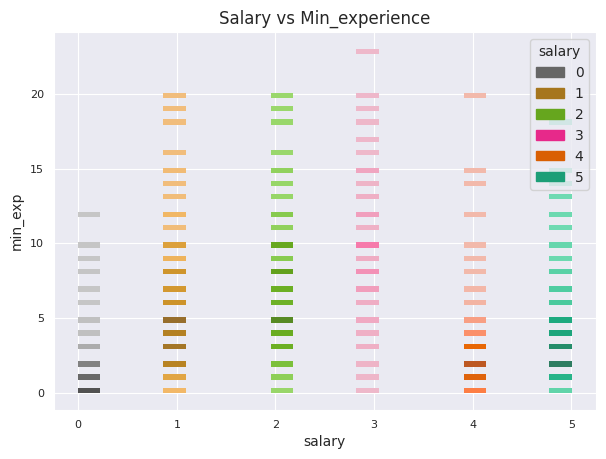

In [87]:
plt.figure(figsize=(7,5))
sns.histplot(x='salary',y='min_exp',hue='salary',data=train,palette='Dark2_r')
sns.set_style('darkgrid')
plt.title('Salary vs Min_experience')

Text(0.5, 1.0, 'Salary vs Max_experience')

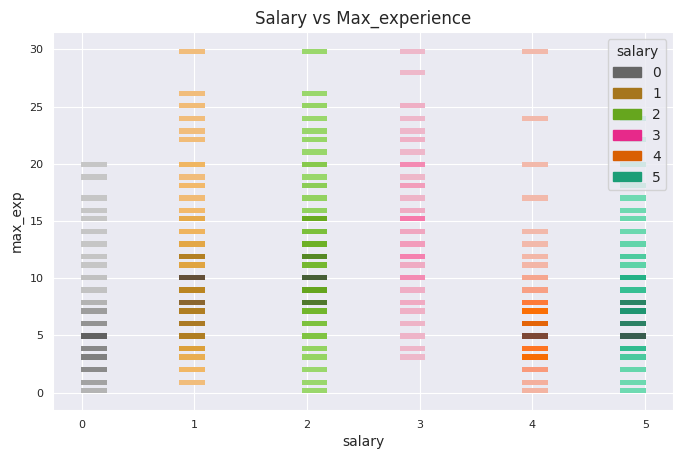

In [86]:
plt.figure(figsize=(8,5))
sns.histplot(x='salary',y='max_exp',hue='salary',data=train,palette='Dark2_r')
sns.set_style('darkgrid')
plt.title('Salary vs Max_experience')